In [1]:
import torch
from transformers import CLIPProcessor, CLIPModel

# Load the CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Your input text
text = ["A photo of a cat", "A photo of a dog"]

# Process the input text
inputs = processor(text=text, return_tensors="pt", padding=True,truncation=True)

# Get text embeddings from CLIP model
with torch.no_grad():
    text_embeddings = model.get_text_features(**inputs)

# Print text embeddings
print(text_embeddings)


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

c:\Users\vivek\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\vivek\.cache\huggingface\hub\models--openai--clip-vit-base-patch32. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tensor([[ 0.1555,  0.0733, -0.2448,  ..., -0.5327, -0.4588,  0.0346],
        [ 0.0932,  0.2764, -0.4137,  ..., -0.5852, -0.2590,  0.1193]])


In [ ]:
device=torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [ ]:
model=model.to(device)

In [ ]:
def get_embedding(text):
  inputs = processor(text=text, return_tensors="pt", padding=True,truncation=True)
  inputs=inputs.to(device)
  # Get text embeddings from CLIP model
  with torch.no_grad():
      text_embeddings = model.get_text_features(**inputs)
  return text_embeddings

In [ ]:
emb=get_embedding("This is apple")
emb.shape

torch.Size([1, 512])

In [ ]:
emb[0]

tensor([-1.2450e-01,  1.3604e-01,  2.2831e-02,  6.8042e-02, -2.7206e-01,
        -3.5902e-01, -2.9313e-01, -9.4576e-01,  5.2612e-01,  7.4923e-02,
        -8.8051e-02,  1.1895e-02, -3.6927e-01,  3.4716e-01,  2.4148e-01,
        -2.7201e-01,  2.4296e-02, -9.5526e-02, -7.7923e-02, -4.6491e-01,
         2.1670e-01, -3.2533e-01,  7.0087e-01,  7.7377e-02, -6.1372e-01,
         1.7907e-01,  2.2456e-01,  2.2025e-01, -5.1561e-02,  2.7079e-01,
        -2.9986e-01,  8.5936e-02, -2.2281e-01,  3.7352e-01, -8.1134e-02,
         2.9200e-01, -2.6019e-01,  1.0609e-01, -1.2142e-01, -8.1121e-02,
        -4.6172e-01, -2.6107e-01,  4.3462e-01, -2.2644e-01,  1.5913e-01,
         2.6801e-01,  2.4487e-02, -9.6870e-02,  3.2349e-01,  4.5789e-01,
         1.5223e-01, -3.8391e-01,  3.7130e-01, -2.7779e-01,  1.3055e-01,
        -3.7077e-02,  1.3743e-01,  1.7334e-02, -2.8128e-01,  1.0853e-01,
         2.8342e-01, -3.8781e-02,  2.2548e-01,  1.3998e-01, -6.6196e-02,
         1.5920e-01, -1.4026e-01, -5.9611e-02, -1.4

#Sentiment analysis of Amazon review

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import torch
from transformers import CLIPProcessor, CLIPModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
# from catboost import CatBoostClassifier


In [ ]:

df = pd.read_csv('/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv')

df_cleaned = df[['Review Text', 'Rating', 'Recommended IND']].dropna()
df_cleaned = df_cleaned[df_cleaned['Recommended IND'].isin([0, 1])]
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.shape

(23486, 11)

<ipython-input-6-a588c469b89a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Recommended IND', palette='viridis')


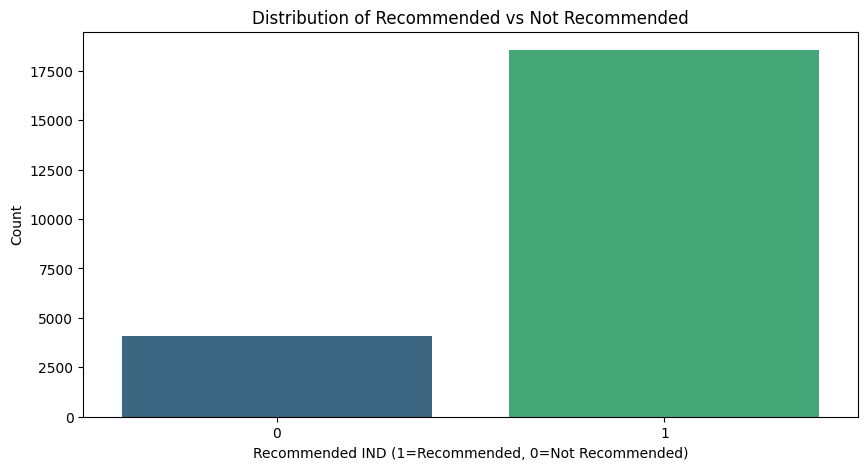

In [6]:

plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x='Recommended IND', palette='viridis')
plt.title('Distribution of Recommended vs Not Recommended')
plt.xlabel('Recommended IND (1=Recommended, 0=Not Recommended)')
plt.ylabel('Count')
plt.show()


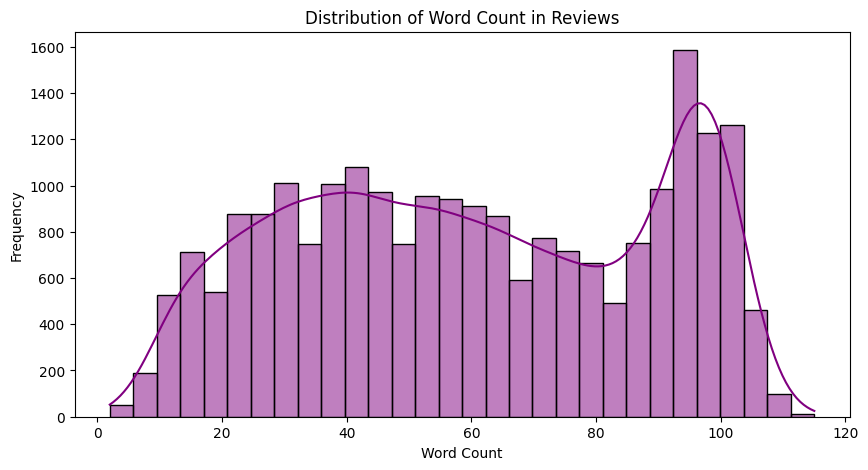

In [7]:
# Word Count Distribution
df_cleaned['Word_Count'] = df_cleaned['Review Text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['Word_Count'], bins=30, kde=True, color='purple')
plt.title('Distribution of Word Count in Reviews')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

<ipython-input-8-d95ca6aeaf50>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='Word_Count', data=df_cleaned, palette='Set3')


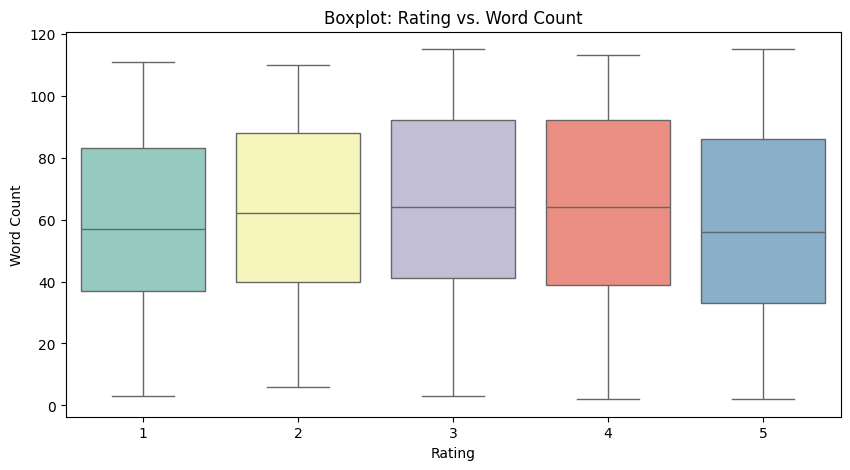

In [8]:
# Boxplot of Rating vs Word Count
plt.figure(figsize=(10, 5))
sns.boxplot(x='Rating', y='Word_Count', data=df_cleaned, palette='Set3')
plt.title('Boxplot: Rating vs. Word Count')
plt.xlabel('Rating')
plt.ylabel('Word Count')
plt.show()


<ipython-input-9-87cd5f4c389b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Recommended IND', y='Rating', data=df_cleaned, split=True, palette='Spectral')


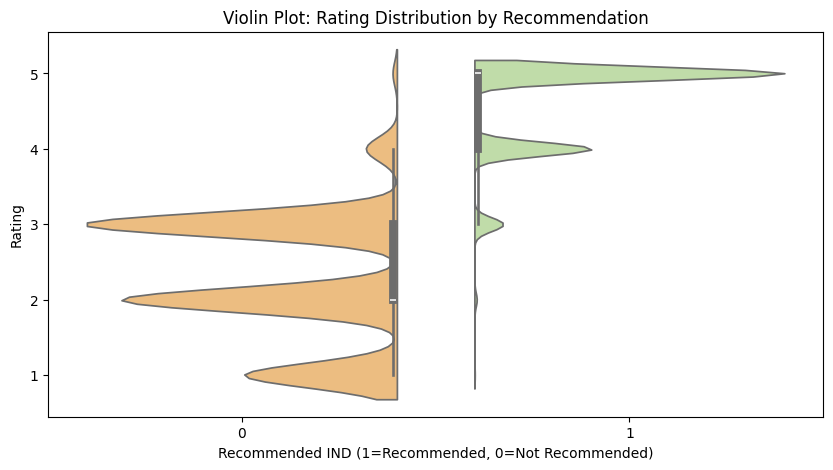

In [9]:

plt.figure(figsize=(10, 5))
sns.violinplot(x='Recommended IND', y='Rating', data=df_cleaned, split=True, palette='Spectral')
plt.title('Violin Plot: Rating Distribution by Recommendation')
plt.xlabel('Recommended IND (1=Recommended, 0=Not Recommended)')
plt.ylabel('Rating')
plt.show()

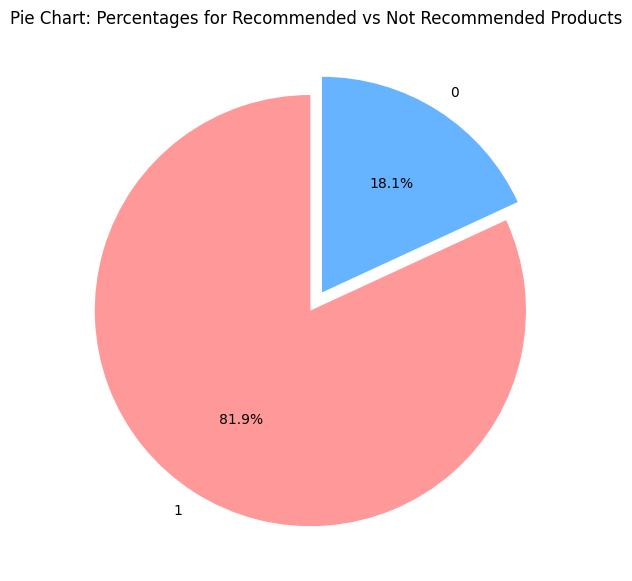

In [10]:
from textblob import TextBlob

# Pie chart: Percentages for recommended and unrecommended products
plt.figure(figsize=(7, 7))
df_cleaned['Recommended IND'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], explode=(0.05, 0.05))
plt.title('Pie Chart: Percentages for Recommended vs Not Recommended Products')
plt.ylabel('')
plt.show()

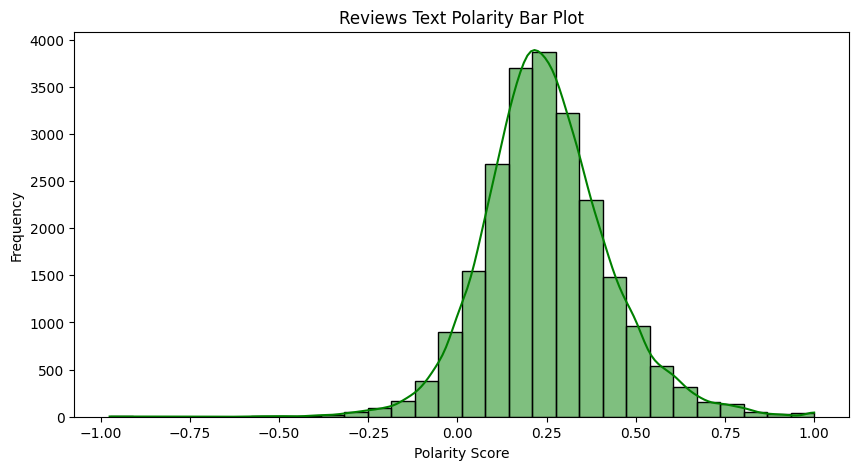

In [11]:
# Calculate Polarity for each review
df_cleaned['Polarity'] = df_cleaned['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Reviews text polarity bar plot
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['Polarity'], bins=30, kde=True, color='green')
plt.title('Reviews Text Polarity Bar Plot')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()

<ipython-input-12-f2537ea1a934>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Recommended IND', y='Rating', data=df_cleaned, palette='coolwarm')


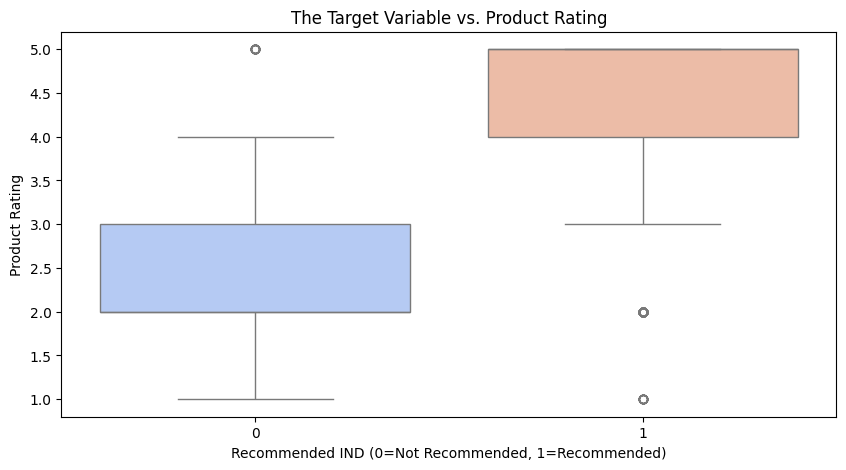

In [12]:

plt.figure(figsize=(10, 5))
sns.boxplot(x='Recommended IND', y='Rating', data=df_cleaned, palette='coolwarm')
plt.title('The Target Variable vs. Product Rating')
plt.xlabel('Recommended IND (0=Not Recommended, 1=Recommended)')
plt.ylabel('Product Rating')
plt.show()

<ipython-input-13-0ed1826aae06>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Rating', palette='magma')


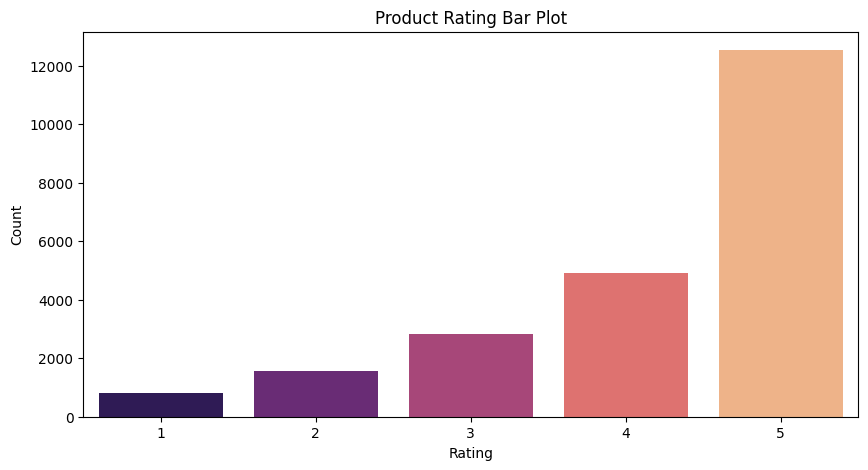

In [13]:

plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x='Rating', palette='magma')
plt.title('Product Rating Bar Plot')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

<ipython-input-14-83da8efab39c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Recommended IND', y='Text_Length', data=df_cleaned, palette='Spectral')


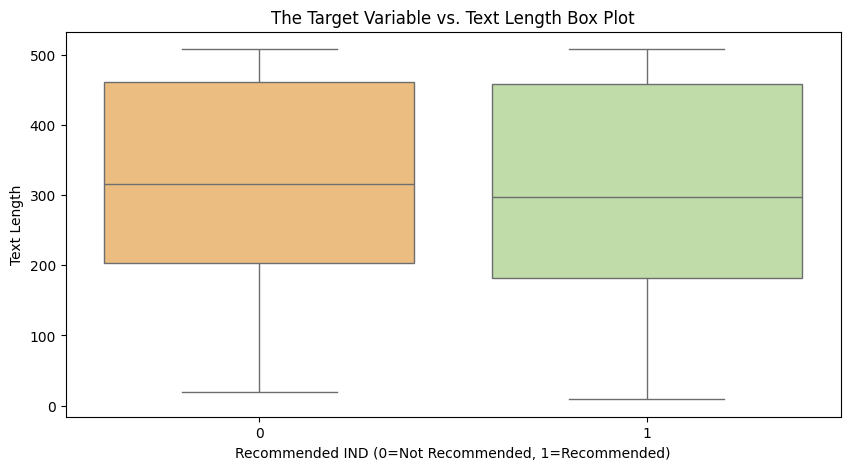

In [14]:

df_cleaned['Text_Length'] = df_cleaned['Review Text'].apply(lambda x: len(x))


plt.figure(figsize=(10, 5))
sns.boxplot(x='Recommended IND', y='Text_Length', data=df_cleaned, palette='Spectral')
plt.title('The Target Variable vs. Text Length Box Plot')
plt.xlabel('Recommended IND (0=Not Recommended, 1=Recommended)')
plt.ylabel('Text Length')
plt.show()


In [15]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [16]:
def clean_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stop_words]
    text = [lemmatizer.lemmatize(word) for word in text]
    return ' '.join(text)

df_cleaned['Processed_Review_Text'] = df_cleaned['Review Text'].apply(clean_text)

In [17]:
df_cleaned

,Review Text,Rating,Recommended IND,Word_Count,Polarity,Text_Length,Processed_Review_Text
0,Absolutely wonderful - silky and sexy and comf...,4,1,8,0.633333,53,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,5,1,62,0.339583,303,love dress sooo pretty happened find store gla...
2,I had such high hopes for this dress and reall...,3,0,98,0.073675,500,high hope dress really wanted work initially o...
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,22,0.550000,124,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,5,1,36,0.512891,192,shirt flattering due adjustable front tie perf...
...,...,...,...,...,...,...,...
23481,I was very happy to snag this dress at such a ...,5,1,28,0.552667,131,happy snag dress great price easy slip flatter...
23482,"It reminds me of maternity clothes. soft, stre...",3,1,38,0.091667,223,reminds maternity clothes soft stretchy shiny ...
23483,"This fit well, but the top was very see throug...",3,0,42,0.414286,208,fit well top see never would worked glad able ...
23484,I bought this dress for a wedding i have this ...,3,1,86,0.322222,427,bought dress wedding summer cute unfortunately...


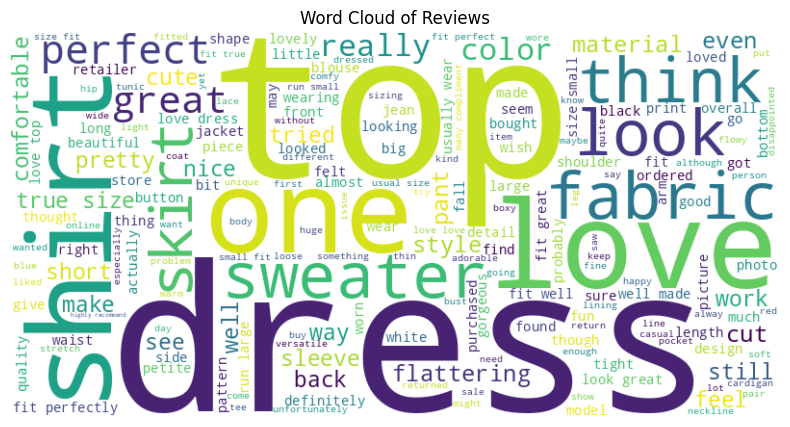

In [18]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_cleaned['Processed_Review_Text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [19]:

X = df_cleaned['Processed_Review_Text'].tolist()
y = df_cleaned['Recommended IND'].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model = model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [21]:
def get_embedding(text):
    inputs = processor(text=text, return_tensors="pt", padding=True, truncation=True)
    inputs = inputs.to(device)
    with torch.no_grad():
        text_embeddings = model.get_text_features(**inputs)
    return text_embeddings.cpu().numpy()

In [22]:

X_train_emb = [get_embedding([text]) for text in X_train]
X_train_emb = torch.cat([torch.tensor(e) for e in X_train_emb])

X_test_emb = [get_embedding([text]) for text in X_test]
X_test_emb = torch.cat([torch.tensor(e) for e in X_test_emb])

In [23]:

# models = {
#     'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
#     'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
#     'KNN': KNeighborsClassifier(n_neighbors=5),
#     'CatBoost': CatBoostClassifier(iterations=100, verbose=0, random_seed=42)
# }

In [24]:

roc_curves = {}

In [25]:

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train.numpy(), y_train)
    y_pred = model.predict(X_test.numpy())


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"{model_name} Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")


    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recommended', 'Recommended'], yticklabels=['Not Recommended', 'Recommended'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()


    y_score = model.predict_proba(X_test.numpy())[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    roc_curves[model_name] = (fpr, tpr, roc_auc)

    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()


Logistic Regression Evaluation Metrics:
Accuracy: 0.8660
Precision: 0.8539
Recall: 0.8660
F1 Score: 0.8548


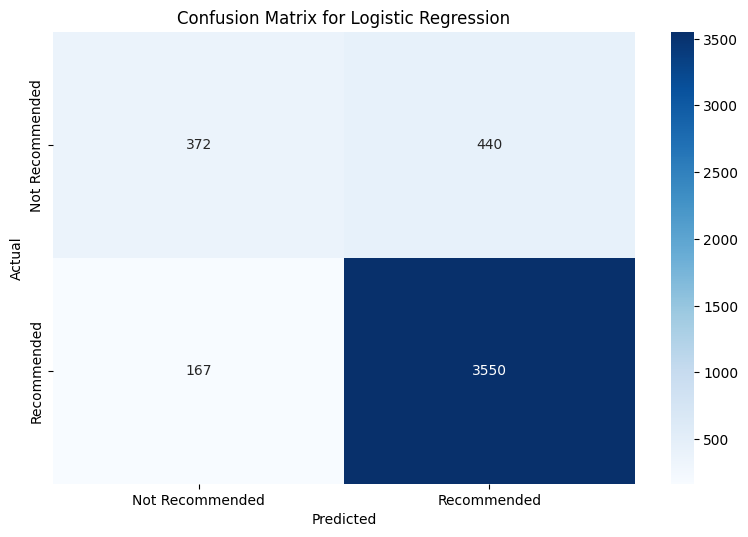

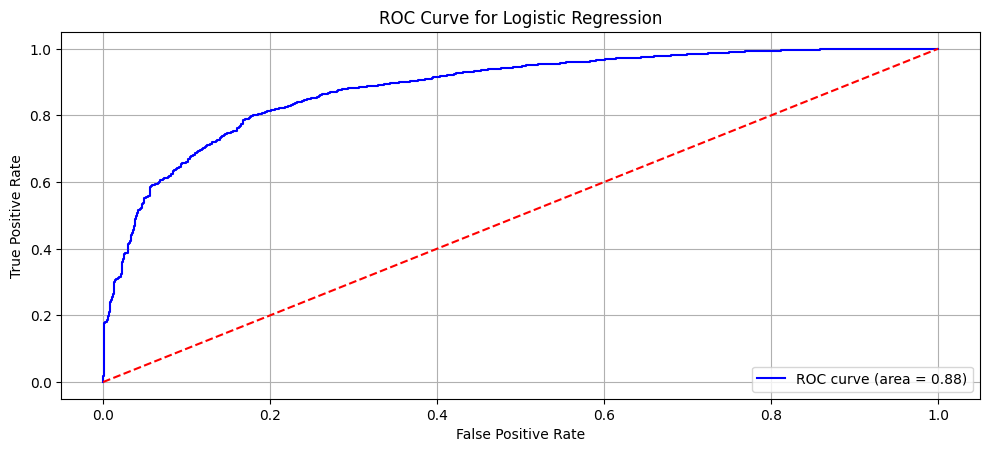

In [ ]:
# Logistic Regression Model
log_reg = LogisticRegression(C=1.2067926406393288, max_iter=300, solver='liblinear')
evaluate_model(log_reg, X_train_emb, y_train, X_test_emb, y_test, "Logistic Regression")

Random Forest Evaluation Metrics:
Accuracy: 0.8302
Precision: 0.8430
Recall: 0.8302
F1 Score: 0.7636


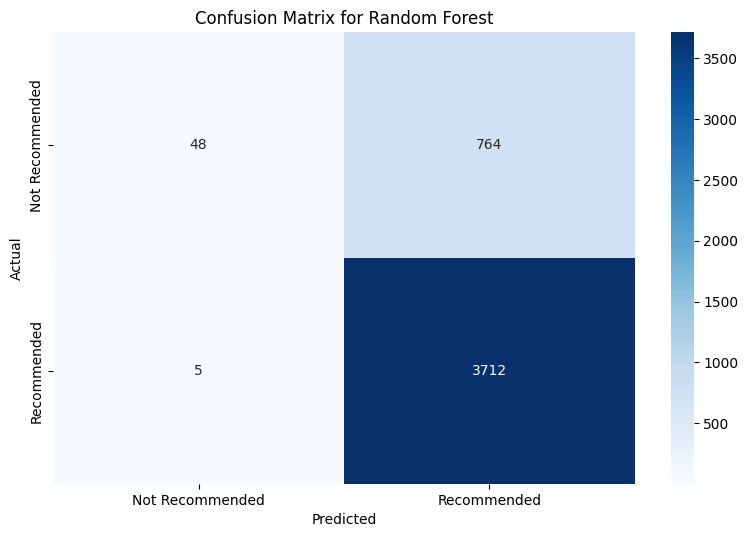

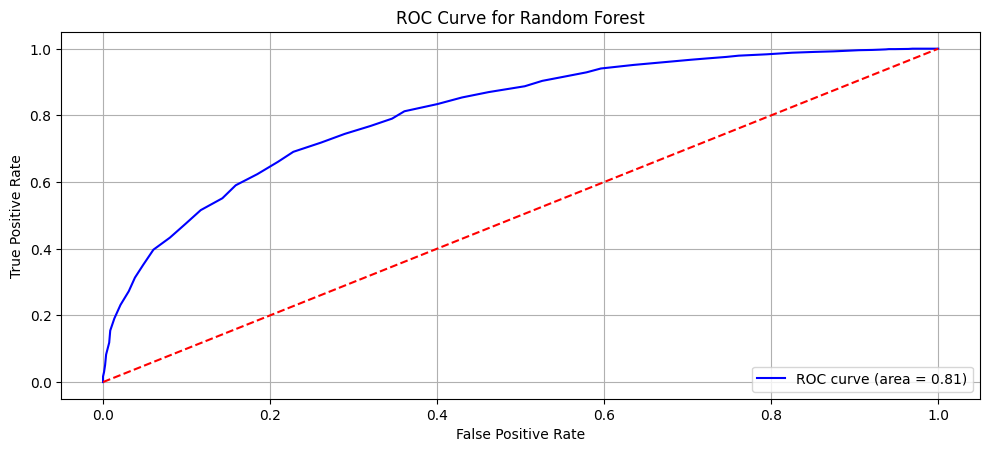

In [ ]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
evaluate_model(rf_model, X_train_emb, y_train, X_test_emb, y_test, "Random Forest")

K-Nearest Neighbors Evaluation Metrics:
Accuracy: 0.8174
Precision: 0.7797
Recall: 0.8174
F1 Score: 0.7861


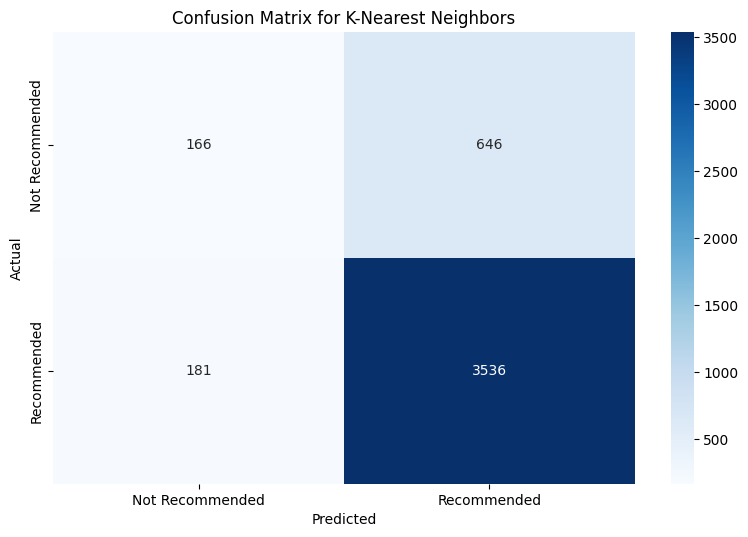

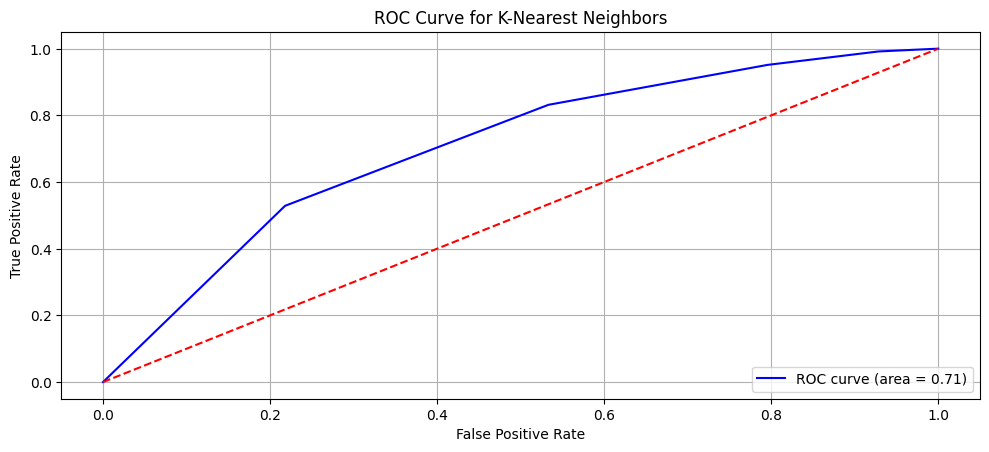

In [ ]:
# K-Nearest Neighbors Model
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train_emb, y_train, X_test_emb, y_test, "K-Nearest Neighbors")

CatBoost Evaluation Metrics:
Accuracy: 0.8541
Precision: 0.8380
Recall: 0.8541
F1 Score: 0.8312


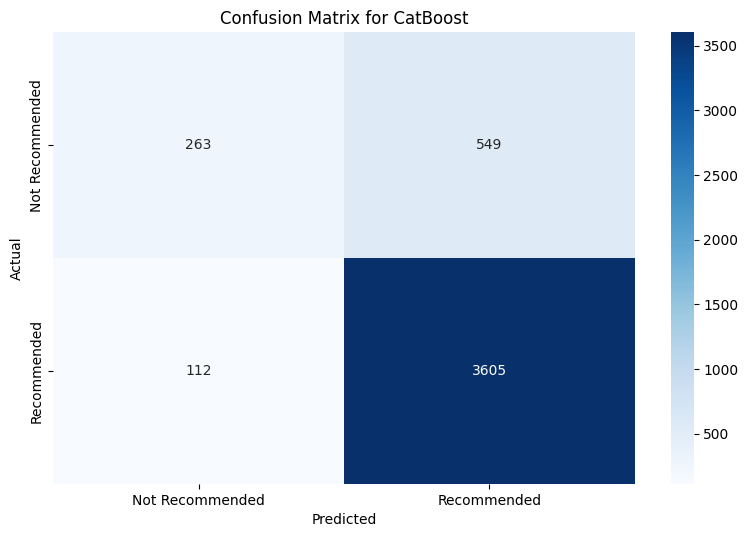

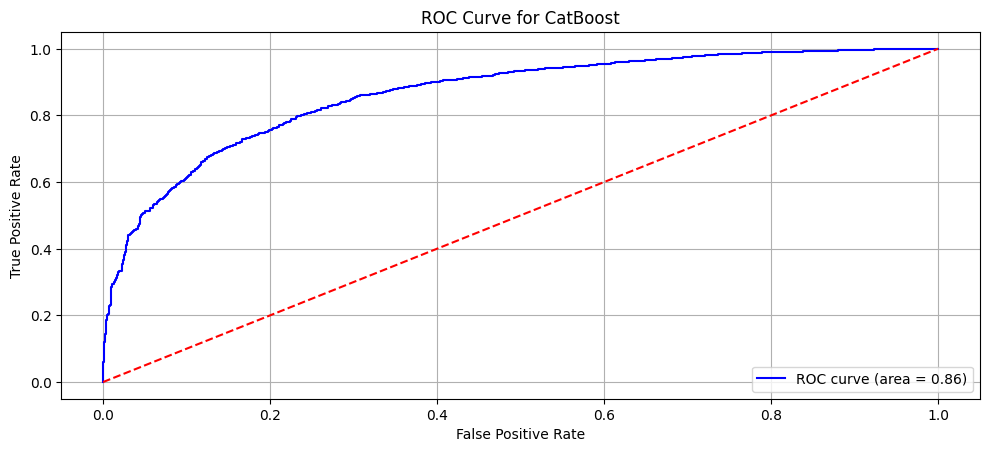

In [ ]:

catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=0)
evaluate_model(catboost_model, X_train_emb, y_train, X_test_emb, y_test, "CatBoost")

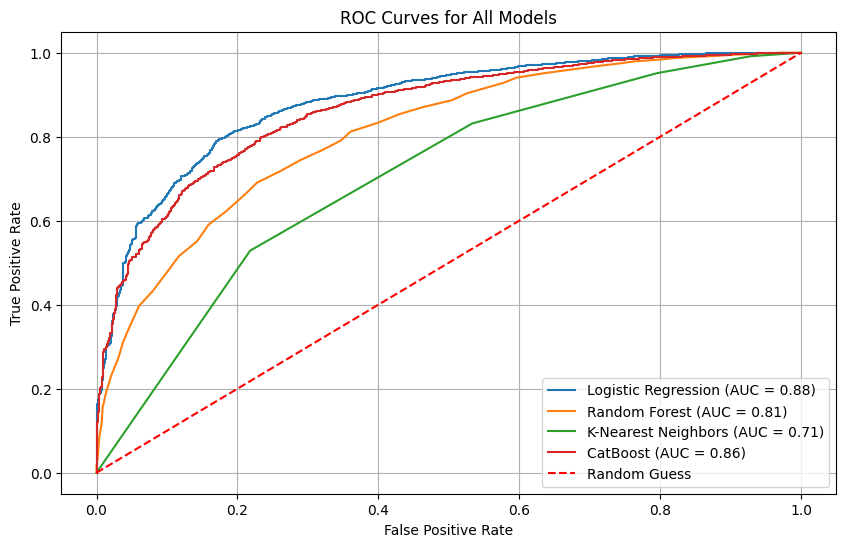

In [ ]:
# Plot all ROC curves
plt.figure(figsize=(10, 6))
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Our Proposed Models:

In [ ]:
# pip install dask

##1) LGBM Classifier

[LightGBM] [Info] Number of positive: 14823, number of negative: 3289
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.216919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 18112, number of used features: 512
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.818408 -> initscore=1.505596
[LightGBM] [Info] Start training from score 1.505596
LGM Evaluation Metrics:
Accuracy: 0.8556
Precision: 0.8418
Recall: 0.8556
F1 Score: 0.8302


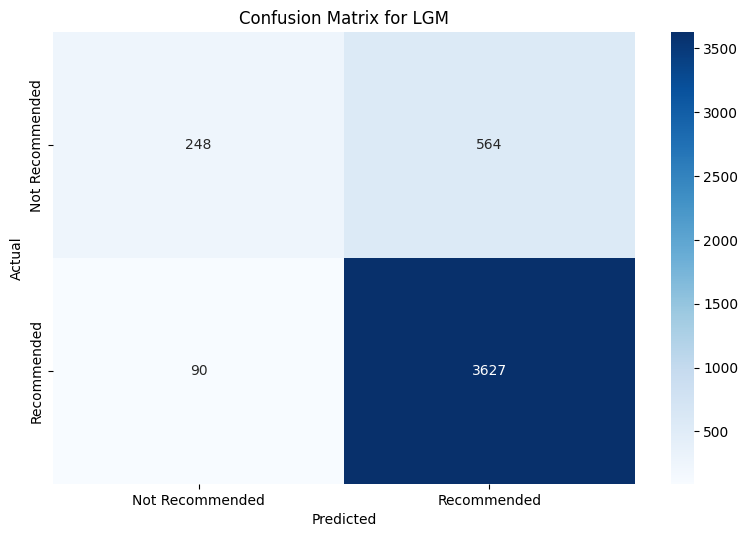

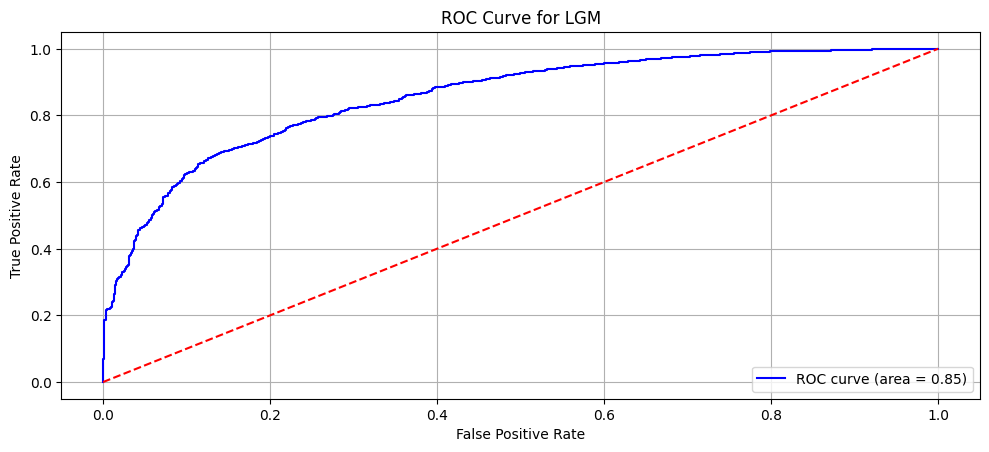

In [ ]:
lgm_model = LGBMClassifier()
evaluate_model(lgm_model, X_train_emb, y_train, X_test_emb, y_test, "LGM")

## 2) Stacked Model with LGBM

In [26]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model_stack(X_train, y_train, X_test, y_test, model_name):
    base_models = [
        ('gradient_boost', GradientBoostingClassifier()),
        ('xgboost', XGBClassifier()),
        ('random_forest', RandomForestClassifier())
    ]

    meta_learner = LGBMClassifier()

    stack_model = StackingClassifier(estimators=base_models, final_estimator=meta_learner)

    stack_model.fit(X_train.numpy(), y_train)

    y_pred = stack_model.predict(X_test.numpy())

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"{model_name} Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recommended', 'Recommended'], yticklabels=['Not Recommended', 'Recommended'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

    y_score = stack_model.predict_proba(X_test.numpy())[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()



/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 14823, number of negative: 3289
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000880 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 575
[LightGBM] [Info] Number of data points in the train set: 18112, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.818408 -> initscore=1.505596
[LightGBM] [Info] Start training from score 1.505596
Stacked Model with LightGBM Evaluation Metrics:
Accuracy: 0.8547
Precision: 0.8384
Recall: 0.8547
F1 Score: 0.8369


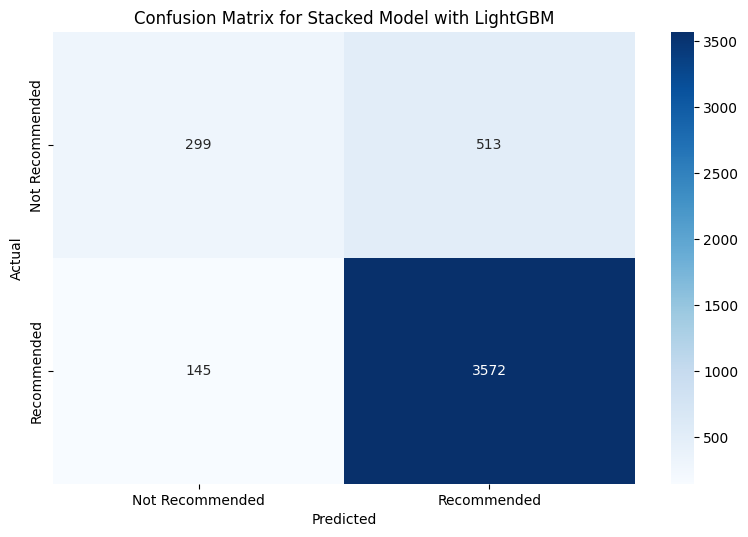

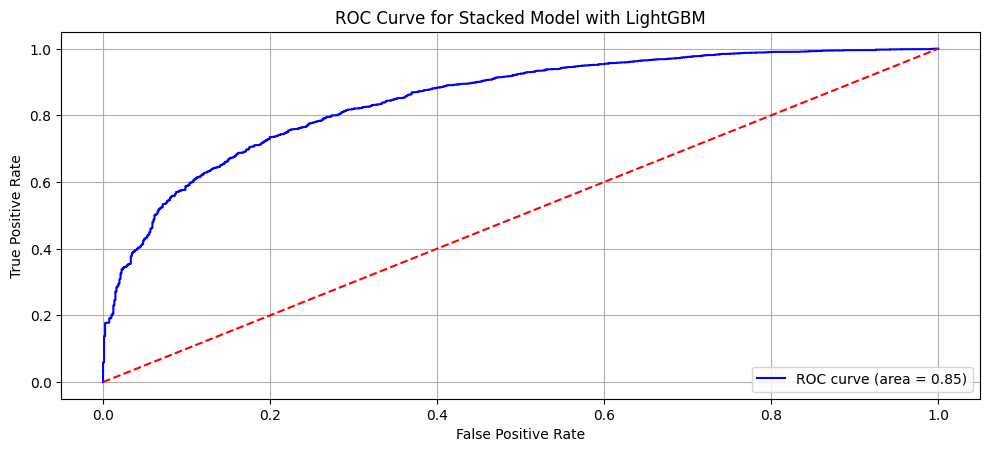

In [27]:
evaluate_model_stack(X_train_emb, y_train, X_test_emb, y_test, 'Stacked Model with LightGBM')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
grad_model = GradientBoostingClassifier()

evaluate_model(grad_model, X_train_emb, y_train, X_test_emb, y_test, "grad_model")

KeyboardInterrupt: 

## 3) XGB Classifier

In [ ]:
from xgboost import XGBClassifier

xgboost Evaluation Metrics:
Accuracy: 0.8543
Precision: 0.8381
Recall: 0.8543
F1 Score: 0.8323


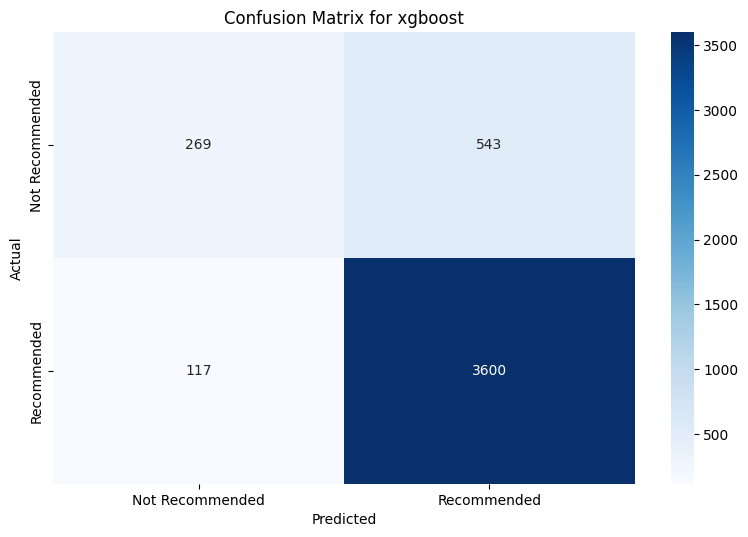

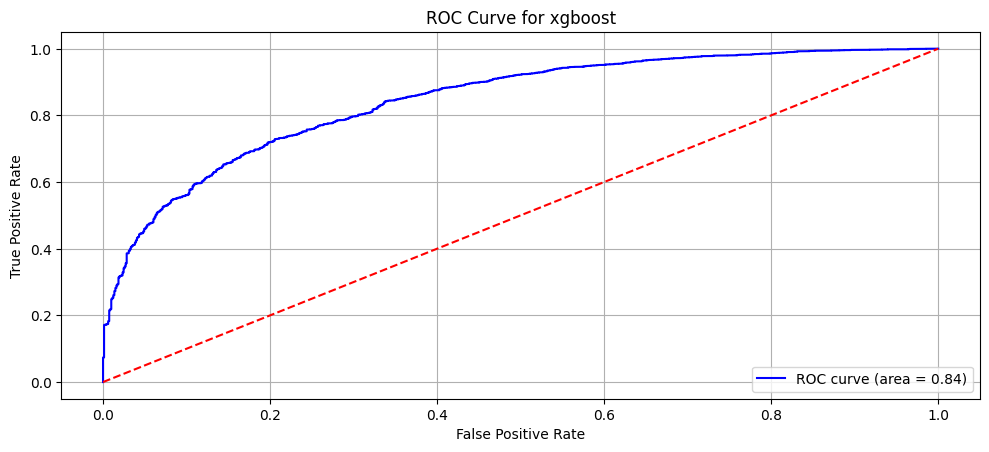

In [ ]:
xg_model = XGBClassifier()
evaluate_model(xg_model, X_train_emb, y_train, X_test_emb, y_test, "xgboost")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 14823, number of negative: 3289
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.188899 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 18112, number of used features: 512
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.818408 -> initscore=1.505596
[LightGBM] [Info] Start training from score 1.505596
Best Parameters: {'subsample': 1.0, 'num_leaves': 50, 'n_estimators': 450, 'min_child_samples': 140, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best Score: 0.8536326979008431
[LightGBM] [Info] Number of positive: 14823, number of negative: 3289
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.258567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13056

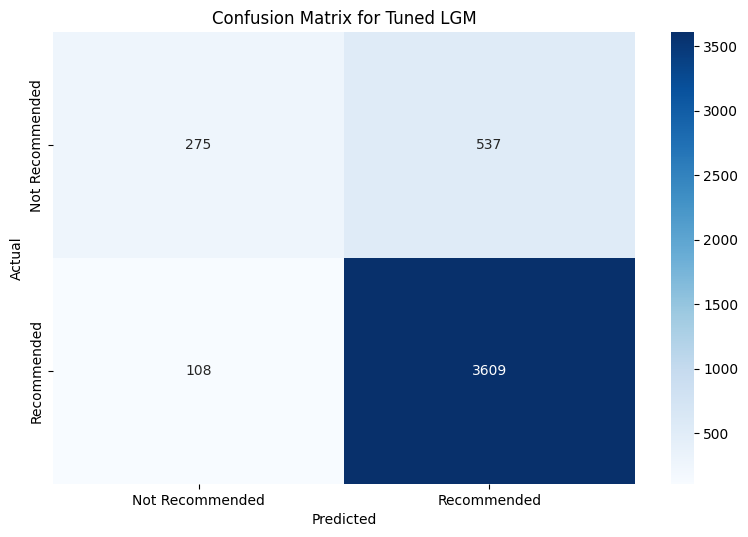

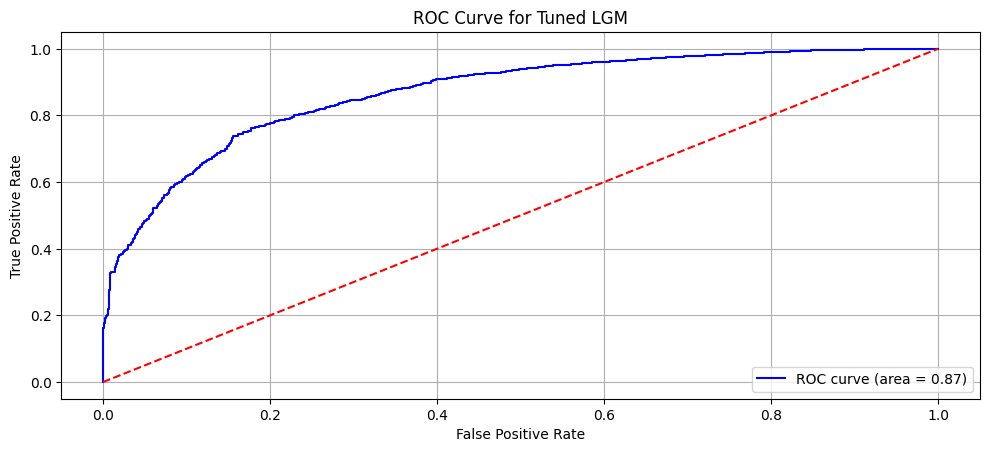

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
import numpy as np

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'num_leaves': np.arange(20, 150, 10),             # Number of leaves in one tree
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],    # Learning rate for boosting
    'n_estimators': np.arange(50, 500, 50),           # Number of boosting rounds
    'min_child_samples': np.arange(20, 200, 20),      # Minimum number of data in one leaf
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],          # Fraction of data used for training
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]    # Fraction of features used for training
}

# Initialize the LightGBM classifier
lgm_model = LGBMClassifier()

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgm_model,
    param_distributions=param_dist,
    n_iter=10,                # Number of parameter combinations to try (iterations)
    scoring='accuracy',        # Metric to optimize (you can use other metrics like f1, recall, etc.)
    cv=5,                      # 5-fold cross-validation
    verbose=1,                 # Show progress
    random_state=42,           # Ensures reproducibility
    n_jobs=-1                  # Use all available cores for parallel computation
)

# Fit RandomizedSearchCV
random_search.fit(X_train_emb, y_train)

# Output the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

# Evaluate the best model found
best_model = random_search.best_estimator_
evaluate_model(best_model, X_train_emb, y_train, X_test_emb, y_test, "Tuned LGM")



The below is the methods of hyperparameter tuning applied on above models

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold
import numpy as np

In [ ]:
log_reg = LogisticRegression()

# KFold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter space to search for Logistic Regression
param_dist = {
    'C': np.logspace(-4, 4, 50),  # Regularization strength
    'solver': ['liblinear', 'saga', 'lbfgs'],  # Solver choices
    'penalty': ['l2'],  # Penalty type
    'max_iter': [100, 200, 300]  # Iterations
}

# RandomizedSearchCV with KFold
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=20,  # Number of random samples to draw from param_dist
    scoring='accuracy',  # Evaluation metric
    cv=kf,  # KFold Cross-Validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Perform RandomizedSearchCV to tune hyperparameters
random_search.fit(X_train_emb, y_train)

# Best Parameters and Best Estimator
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Estimator: {random_search.best_estimator_}")

# Evaluate on the test set
y_pred = random_search.predict(X_test_emb)
y_prob = random_search.predict_proba(X_test_emb)[:, 1]

# Classification Report
print("Classification Report:\n", classification_report(y_test_emb, y_pred))

# AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC: {roc_auc:.4f}")

# Plot AUC-ROC Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print other evaluation metrics (accuracy, f1 score)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 300, 'C': 1.2067926406393288}
Best Estimator: LogisticRegression(C=1.2067926406393288, max_iter=300, solver='liblinear')


NameError: name 'classification_report' is not defined

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Random Forest Classifier
rf = RandomForestClassifier()

# KFold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter space to search for Random Forest
param_dist_rf = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],  # Number of trees
    'max_depth': [int(x) for x in np.linspace(10, 100, num=10)],  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used
}

# RandomizedSearchCV with KFold
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=1,  # Number of random samples to draw from param_dist
    scoring='accuracy',  # Evaluation metric
    cv=kf,  # KFold Cross-Validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Perform RandomizedSearchCV to tune hyperparameters for Random Forest
random_search_rf.fit(X_train_emb, y_train)

# Best Parameters and Best Estimator for Random Forest
print(f"Best Parameters: {random_search_rf.best_params_}")
print(f"Best Estimator: {random_search_rf.best_estimator_}")

# Evaluate on the test set
y_pred_rf = random_search_rf.predict(X_test_emb)
y_prob_rf = random_search_rf.predict_proba(X_test_emb)[:, 1]

# Classification Report for Random Forest
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))

# AUC-ROC Curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"AUC-ROC for Random Forest: {roc_auc_rf:.4f}")

# Plot AUC-ROC Curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print other evaluation metrics (accuracy, f1 score) for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import RandomizedSearchCV, KFold
# from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, f1_score
# import matplotlib.pyplot as plt

# # K-Nearest Neighbors Classifier
# knn = KNeighborsClassifier()

# # KFold Cross Validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # Hyperparameter space to search for KNN
# param_dist_knn = {
#     'n_neighbors': [int(x) for x in np.linspace(start=1, stop=30, num=30)],  # Number of neighbors
#     'weights': ['uniform', 'distance'],  # Weight function used in prediction
#     'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
# }

# # RandomizedSearchCV with KFold
# random_search_knn = RandomizedSearchCV(
#     estimator=knn,
#     param_distributions=param_dist_knn,
#     n_iter=20,  # Number of random samples to draw from param_dist
#     scoring='accuracy',  # Evaluation metric
#     cv=kf,  # KFold Cross-Validation
#     verbose=1,
#     random_state=42,
#     n_jobs=-1
# )

# # Perform RandomizedSearchCV to tune hyperparameters for KNN
# random_search_knn.fit(X_train_emb, y_train)

# # Best Parameters and Best Estimator for KNN
# print(f"Best Parameters: {random_search_knn.best_params_}")
# print(f"Best Estimator: {random_search_knn.best_estimator_}")

# # Evaluate on the test set
# y_pred_knn = random_search_knn.predict(X_test_emb)
# y_prob_knn = random_search_knn.predict_proba(X_test_emb)[:, 1]

# # Classification Report for KNN
# print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))

# # AUC-ROC Curve for KNN
# fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
# roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
# print(f"AUC-ROC for KNN: {roc_auc_knn:.4f}")

# # Plot AUC-ROC Curve for KNN
# plt.figure(figsize=(8, 6))
# plt.plot(fpr_knn, tpr_knn, color='blue', label=f'ROC curve (area = {roc_auc_knn:.2f}')


In [ ]:
# from catboost import CatBoostClassifier
# from sklearn.model_selection import RandomizedSearchCV, KFold
# from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, f1_score
# import matplotlib.pyplot as plt

# # CatBoost Classifier
# catboost = CatBoostClassifier(silent=True)  # Set silent=True to suppress output

# # KFold Cross Validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # Hyperparameter space to search for CatBoost
# param_dist_catboost = {
#     'iterations': [100, 200, 500],  # Number of boosting iterations
#     'depth': [4, 6, 8, 10],  # Depth of the trees
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
#     'l2_leaf_reg': [1, 3, 5, 7, 9],  # L2 regularization coefficient
#     'border_count': [32, 64, 128],  # Number of splits for numerical features
#     'random_strength': [1, 2, 3, 5, 10]  # Random strength for CatBoost
# }

# # RandomizedSearchCV with KFold
# random_search_catboost = RandomizedSearchCV(
#     estimator=catboost,
#     param_distributions=param_dist_catboost,
#     n_iter=20,  # Number of random samples to draw from param_dist
#     scoring='accuracy',  # Evaluation metric
#     cv=kf,  # KFold Cross-Validation
#     verbose=1,
#     random_state=42,
#     n_jobs=-1
# )

# # Perform RandomizedSearchCV to tune hyperparameters for CatBoost
# random_search_catboost.fit(X_train_emb, y_train)

# # Best Parameters and Best Estimator for CatBoost
# print(f"Best Parameters: {random_search_catboost.best_params_}")
# print(f"Best Estimator: {random_search_catboost.best_estimator_}")

# # Evaluate on the test set
# y_pred_catboost = random_search_catboost.predict(X_test_emb)
# y_prob_catboost = random_search_catboost.predict_proba(X_test_emb)[:, 1]

# # Classification Report for CatBoost
# print("Classification Report for CatBoost:\n", classification_report(y_test, y_pred_catboost))

# # AUC-ROC Curve for CatBoost
# fpr_catboost, tpr_catboost, thresholds_catboost = roc_curve(y_test, y_prob_catboost)
# roc_auc_catboost = roc_auc_score(y_test, y_prob_catboost)
# print(f"AUC-ROC for CatBoost: {roc_auc_catboost:.4f}")

# # Plot AUC-ROC Curve for CatBoost
# plt.figure(figsize=(8, 6))
# plt.plot(fpr_catboost, tpr_catboost, color='blue', label=f'ROC curve (area = {roc_auc_catboost:.2f})')
# plt.plot([0, 1], [0, 1], color='red', linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('AUC-ROC Curve for CatBoost')
# plt.legend(loc='lower right')
# plt.grid()
# plt.show()

# # Print other evaluation metrics (accuracy, f1 score) for CatBoost
# accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
# f1_catboost = f1_score(y_test, y_pred_catboost)
# print(f"Accuracy: {accuracy_catboost:.4f}")
# print(f"F1 Score: {f1_catboost:.4f}")
